# Visualize and Plot results

In [9]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
#matplotlib.rcParams['text.usetex'] = True
cmap = plt.get_cmap('tab10')
from matplotlib.lines import Line2D

import seaborn as sns
sns.set_theme()

import json

data_path = "./data/"

#### Entanglement scaling

In [39]:
ent_path = data_path + "ent_scaling/"
#idx_run = "2022-02-07_23-00-40_574_10" # abbass qnn
#idx_run = "2022-02-07_23-08-27_603_10" # ring+local
#idx_run = "2022-02-07_23-23-25_515_10" # dummy
#idx_run = "2022-02-07_23-29-51_515" # 2 2local
#idx_run = "2022-02-07_23-46-04_574" # circuit 9 + two_local
#idx_run = "2022-02-08_16-51-19_434" # circuit 9 + circuit9
#idx_run = "2022-02-08_17-12-57_725"

ent_data = np.load(ent_path + idx_run + ".npy", allow_pickle=True)
with open(ent_path + idx_run + '.json') as file:
    ent_metadata = json.load(file)
print(ent_metadata)

{'max_num_qubits': 6, 'backend': 'Aer', 'alternate': True, 'fmap': 'circuit9-158109', 'fmap_entanglement': 'linear', 'var_ansatz': 'circuit9-158112', 'var_entanglement': 'linear'}


A single element in the `ent_data` list, be it `data = ent_data[0]`, contains the results for a specific number of qubits, with varying repetitions. It is organized as follows:
1. `data[0]`: contains total entanglement (1d-array of dimension num_reps)
2. `data[1]`: standard deviation of total entanglement (check if calculated correctly, but not important as results are consistent)
3. `data[3]`: expected total entanglement if Haar.

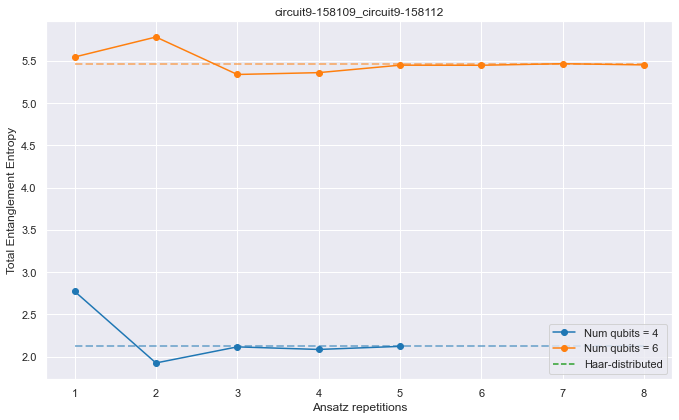

In [45]:
fig = plt.figure(figsize=(9.6, 6))
plt.title(f"{ent_metadata['fmap']}_{ent_metadata['var_ansatz']}")
plt.ylabel("Total Entanglement Entropy")
plt.xlabel("Ansatz repetitions")

for idx, data in enumerate(ent_data):
    plt.hlines(data[2], 1, len(ent_data[-1][0]), ls="--", color=cmap(idx), lw = 2, alpha = 0.5)
    plt.plot(range(1, len(data[0])+1), data[0], ls="-", marker="o", c=cmap(idx), label=f"Num qubits = {2*(idx+1)+2}")
    #plt.errorbar(range(1, len(data[0])+1), data[0], yerr=data[1], ls="-", marker="o", c=cmap(idx), label=f"Num qubits = {2*(idx+1)+2}")

plt.plot([],[], ls ='--', color = cmap(idx+1), label = "Haar-distributed")

plt.legend()
plt.tight_layout()
#plt.savefig(ent_path + "/Imgs/" + idx_run + ".pdf", format = "pdf")


### Optimal repetition

In [4]:
idx_run = "10_linear"
reps_data = np.load(data_path+"optimal_reps/" + idx_run + ".npz")

x = reps_data['x']
y = reps_data['y']
q = reps_data['q'] # intercept
m = reps_data['m'] # slope

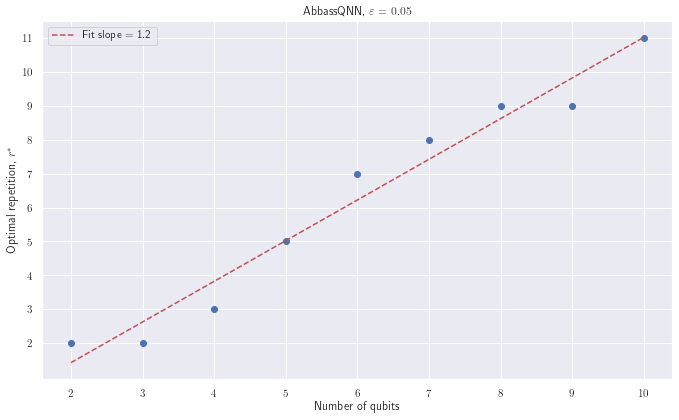

In [18]:
fig = plt.figure(figsize=(9.6, 6))

plt.title(fr"AbbassQNN, $\varepsilon={0.05}$")
plt.xlabel("Number of qubits")
plt.ylabel(fr"Optimal repetition, $r^*$")

plt.xticks(range(min(x), max(x)+1))
plt.yticks(range(min(y), max(y)+1))

plt.scatter(x, y, marker='o')
plt.plot(x, q + m * x, 'r', ls='--',
         label=f'Fit slope = {np.round(m,3)}')

plt.legend()
plt.tight_layout()

#### [Random] Circuits plot 

66


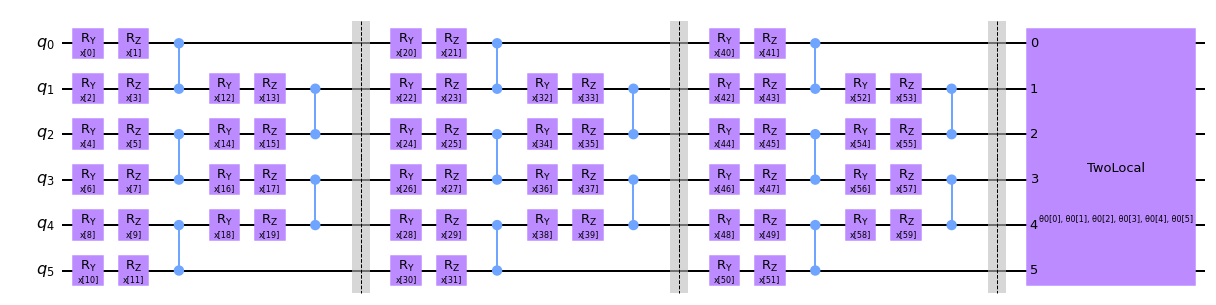

In [2]:
from circuits import *
import matplotlib.pyplot as plt

num_qubits = 6
alternate = True
num_reps = 1

# Select circuit
# ansatz = Abbas_QNN(num_qubits, reps=num_reps, alternate=alternate, barrier=True)  # AbbassQNN
#feature_map = ring_circ(num_qubits, num_reps = 1, barrier=False) # Ring circ
feature_map = piramidal_circuit(num_qubits=num_qubits, num_reps=3, piramidal=False, barrier=True)
#feature_map = ZZFeatureMap(num_qubits, reps=1, entanglement='linear')
#feature_map = TwoLocal(num_qubits, 'rx', 'cx', 'linear', reps=1, insert_barriers=False, skip_final_rotation_layer=True)
var_ansatz = TwoLocal(num_qubits, 'ry', 'cx', 'linear', reps=1, insert_barriers=False, skip_final_rotation_layer=True)

ansatz = general_qnn(num_reps, feature_map=feature_map,
                     var_ansatz=var_ansatz, alternate=alternate, barrier=False)

print(len(ansatz.parameters))
ansatz.draw()

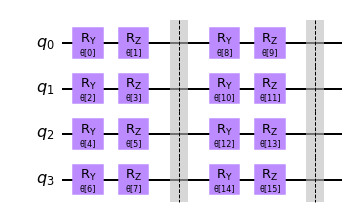

In [3]:
dummy_circ(4, 2, barrier = True).draw()

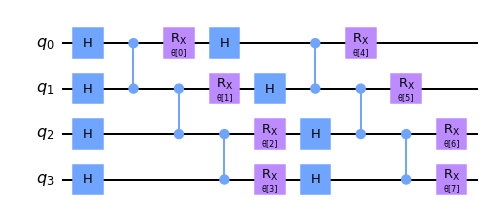

In [7]:
circ9(4, 2).draw()